# Random Forest

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
df_RF = pd.read_csv('MergredDataForRF.csv')
df_RF.columns

Index(['Date', 'Maximum Temperature', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Heat Index', 'Precipitation', 'Snow', 'Snow Depth',
       'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity', 'CrashCount'],
      dtype='object')

In [3]:
df_RF.drop(['Maximum Temperature', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Heat Index', 'Snow Depth',
       'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity'], axis = 1, inplace= True)
df_RF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1461 non-null   object 
 1   Precipitation  1461 non-null   float64
 2   Snow           1461 non-null   float64
 3   CrashCount     1461 non-null   int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 45.8+ KB


In [4]:
df_RF['Date'] = pd.to_datetime(df_RF['Date'])


In [5]:
df_RF= df_RF.groupby([df_RF['Date'].dt.day], as_index= False).mean().reset_index()
df_RF

,index,Precipitation,Snow,CrashCount
0,0,0.090000,0.061042,75.562500
1,1,0.106250,0.009167,70.666667
2,2,0.113750,0.152083,71.208333
3,3,0.075833,0.018125,71.270833
4,4,0.119583,0.008542,76.020833
5,5,0.115833,0.026875,72.125000
6,6,0.140208,0.041458,74.916667
7,7,0.096875,0.038958,72.041667
8,8,0.105208,0.018542,74.104167
9,9,0.066250,0.005208,73.750000


In [6]:
dummy = pd.get_dummies(df_RF['index'])
dummy.columns = ['Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','Day_8','Day_9','Day_10',
                  'Day_11','Day_12','Day_13','Day_14','Day_15','Day_16','Day_17','Day_18','Day_19','Day_20',
                  'Day_21','Day_22','Day_23','Day_24','Day_25','Day_26','Day_27','Day_28','Day_29','Day_30',
                  'Day_31']   
df_RF = pd.concat([df_RF, dummy] , axis = 1)
df_RF.shape

(31, 35)

In [7]:
# Labels are the values we want to predict
labels = np.array(df_RF['CrashCount'])
labels

array([75.5625    , 70.66666667, 71.20833333, 71.27083333, 76.02083333,
       72.125     , 74.91666667, 72.04166667, 74.10416667, 73.75      ,
       71.77083333, 74.27083333, 76.39583333, 73.29166667, 73.625     ,
       76.72916667, 71.25      , 75.85416667, 72.95833333, 73.125     ,
       73.64583333, 73.22916667, 72.45833333, 68.97916667, 69.95833333,
       69.625     , 70.27083333, 71.33333333, 73.22222222, 72.79545455,
       70.82142857])

In [8]:
# Saving feature names for later use
feature_list = list(df_RF.columns)

# Remove the labels from the features
# axis 1 refers to the columns
df_RF= df_RF.drop(['CrashCount','index'], axis = 1)

df_RF = np.array(df_RF)


In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_RF,labels,test_size=0.25,random_state = 42)

In [10]:
print('Training data set length='+str(len(x_train)))
print('Testing data set length='+str(len(x_test)))

Training data set length=23
Testing data set length=8


In [11]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(x_train, y_train);

In [15]:
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')


Mean Absolute Error: 2.74 degrees.


In [16]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 96.27 %.


In [17]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: Precipitation        Importance: 0.51
Variable: Day_3                Importance: 0.16
Variable: index                Importance: 0.11
Variable: Day_11               Importance: 0.09
Variable: Day_1                Importance: 0.04
Variable: Day_5                Importance: 0.03
Variable: Snow                 Importance: 0.02
Variable: CrashCount           Importance: 0.01
Variable: Day_10               Importance: 0.01
Variable: Day_24               Importance: 0.01
Variable: Day_2                Importance: 0.0
Variable: Day_4                Importance: 0.0
Variable: Day_6                Importance: 0.0
Variable: Day_7                Importance: 0.0
Variable: Day_8                Importance: 0.0
Variable: Day_9                Importance: 0.0
Variable: Day_12               Importance: 0.0
Variable: Day_13               Importance: 0.0
Variable: Day_14               Importance: 0.0
Variable: Day_15               Importance: 0.0
Variable: Day_16               Importance: 0.0
Var

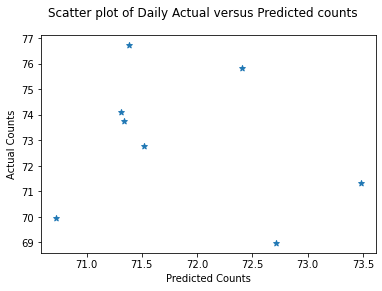

In [18]:
fig = plt.figure()
fig.suptitle('Scatter plot of Daily Actual versus Predicted counts')
plt.scatter(x=y_pred, y=y_test, marker='*')
plt.xlabel('Predicted Counts')
plt.ylabel('Actual Counts')
plt.show()